# Runs Prediction with Linear Regression model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


In [2]:
#GET DATA
df = pd.read_csv("C:\\Users\\saipr\\Downloads\\most_runs_in_ipl.csv")
df


,Rank,Player,Team,Runs,4s,6s,Mat,Innings,Highest,100s,50s,Avg,SR
0,1,Virat Kohli,RCB,6624,578,218,223,215,113,5,44,36.20,129.15
1,2,Shikhar Dhawan,PBKS,6244,701,136,206,205,106*,2,47,35.08,126.35
2,3,David Warner,DC,5881,561,211,162,162,126,4,54,42.01,140.69
3,4,Rohit Sharma,MI,5879,519,240,227,222,109*,1,40,30.30,129.89
4,5,Suresh Raina,CSK,5528,506,203,205,200,100*,1,39,32.52,136.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Deepak Hooda,LSG,1236,77,56,95,75,64,0,7,20.26,132.05
71,72,Ruturaj Gaikwad,CSK,1207,113,43,36,36,101*,1,10,37.72,130.35
72,73,Kedar Jadhav,SRH,1196,101,40,93,80,69,0,4,22.15,123.17
73,74,Irfan Pathan,GL,1139,87,37,103,82,60,0,1,21.49,120.40


In [3]:
df.head()

,Rank,Player,Team,Runs,4s,6s,Mat,Innings,Highest,100s,50s,Avg,SR
0,1,Virat Kohli,RCB,6624,578,218,223,215,113,5,44,36.20,129.15
1,2,Shikhar Dhawan,PBKS,6244,701,136,206,205,106*,2,47,35.08,126.35
2,3,David Warner,DC,5881,561,211,162,162,126,4,54,42.01,140.69
3,4,Rohit Sharma,MI,5879,519,240,227,222,109*,1,40,30.30,129.89
4,5,Suresh Raina,CSK,5528,506,203,205,200,100*,1,39,32.52,136.76


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Rank     75 non-null     int64  
 1   Player   75 non-null     object 
 2   Team     75 non-null     object 
 3   Runs     75 non-null     int64  
 4   4s       75 non-null     int64  
 5   6s       75 non-null     int64  
 6   Mat      75 non-null     int64  
 7   Innings  75 non-null     int64  
 8   Highest  75 non-null     object 
 9   100s     75 non-null     int64  
 10  50s      75 non-null     int64  
 11  Avg      75 non-null     float64
 12  SR       75 non-null     float64
dtypes: float64(2), int64(8), object(3)
memory usage: 7.7+ KB


In [5]:
df.shape

(75, 13)

In [6]:
df[df.duplicated()]


,Rank,Player,Team,Runs,4s,6s,Mat,Innings,Highest,100s,50s,Avg,SR


In [7]:
df.isnull().value_counts()


Rank   Player  Team   Runs   4s     6s     Mat    Innings  Highest  100s   50s    Avg    SR   
False  False   False  False  False  False  False  False    False    False  False  False  False    75
Name: count, dtype: int64

In [8]:
df.describe


<bound method NDFrame.describe of     Rank           Player  Team  Runs   4s   6s  Mat  Innings Highest  100s  \
0      1      Virat Kohli   RCB  6624  578  218  223      215     113     5   
1      2   Shikhar Dhawan  PBKS  6244  701  136  206      205    106*     2   
2      3     David Warner    DC  5881  561  211  162      162     126     4   
3      4     Rohit Sharma    MI  5879  519  240  227      222    109*     1   
4      5     Suresh Raina   CSK  5528  506  203  205      200    100*     1   
..   ...              ...   ...   ...  ...  ...  ...      ...     ...   ...   
70    71     Deepak Hooda   LSG  1236   77   56   95       75      64     0   
71    72  Ruturaj Gaikwad   CSK  1207  113   43   36       36    101*     1   
72    73     Kedar Jadhav   SRH  1196  101   40   93       80      69     0   
73    74     Irfan Pathan    GL  1139   87   37  103       82      60     0   
74    75       Axar Patel    DC  1135   67   54  122       88      44     0   

    50s    Avg   

C:\Users\saipr\AppData\Local\Temp\ipykernel_18236\3655930296.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Avg'],bins=30)


<Axes: xlabel='Avg', ylabel='Density'>

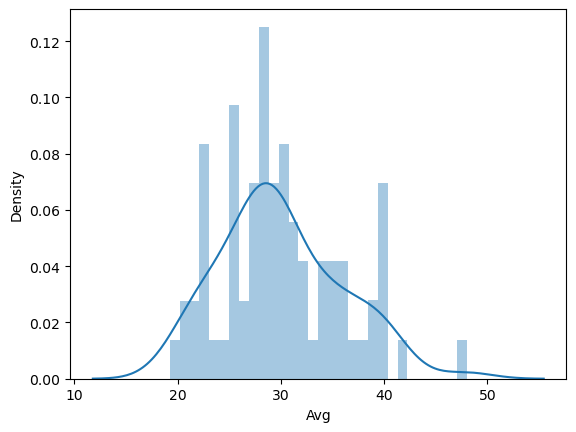

In [9]:
sns.distplot(df['Avg'],bins=30)



<Axes: xlabel='Team', ylabel='Runs'>

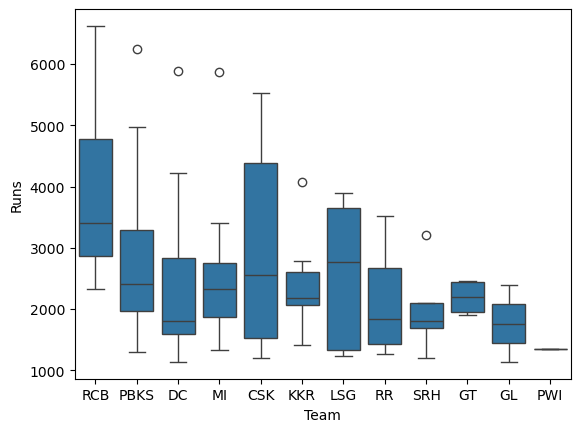

In [10]:
sns.boxplot(x='Team',y='Runs',data=df)




In [11]:
df['Highest'] = df['Highest'].astype(str).str.replace('*', '', regex=False)
df['Highest'] = pd.to_numeric(df['Highest'], errors='coerce')

df['Avg'] = df['Avg'].astype(float)
df['SR'] = df['SR'].astype(float)
df['Runs']=df['Runs'].astype(float)
df['4s']=df['4s'].astype(float)
df['6s']=df['6s'].astype(float)
df['Mat']=df['Mat'].astype(float)
df['Innings']=df['Innings'].astype(float)
df['Highest']=df['Highest'].astype(float)
df['100s']=df['100s'].astype(float)
df['50s']=df['50s'].astype(float)
df

,Rank,Player,Team,Runs,4s,6s,Mat,Innings,Highest,100s,50s,Avg,SR
0,1,Virat Kohli,RCB,6624.0,578.0,218.0,223.0,215.0,113.0,5.0,44.0,36.20,129.15
1,2,Shikhar Dhawan,PBKS,6244.0,701.0,136.0,206.0,205.0,106.0,2.0,47.0,35.08,126.35
2,3,David Warner,DC,5881.0,561.0,211.0,162.0,162.0,126.0,4.0,54.0,42.01,140.69
3,4,Rohit Sharma,MI,5879.0,519.0,240.0,227.0,222.0,109.0,1.0,40.0,30.30,129.89
4,5,Suresh Raina,CSK,5528.0,506.0,203.0,205.0,200.0,100.0,1.0,39.0,32.52,136.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,71,Deepak Hooda,LSG,1236.0,77.0,56.0,95.0,75.0,64.0,0.0,7.0,20.26,132.05
71,72,Ruturaj Gaikwad,CSK,1207.0,113.0,43.0,36.0,36.0,101.0,1.0,10.0,37.72,130.35
72,73,Kedar Jadhav,SRH,1196.0,101.0,40.0,93.0,80.0,69.0,0.0,4.0,22.15,123.17
73,74,Irfan Pathan,GL,1139.0,87.0,37.0,103.0,82.0,60.0,0.0,1.0,21.49,120.40


# Training and Testing Data

In [ ]:
#splitting the data into training and testing sets 
X=df[['4s','6s','Mat','Innings','Highest','100s','50s','Avg','SR']]
y=df['Runs']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)



In [14]:
#Training the Model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

# Predicting Test Data

In [ ]:
Predictions = lm.predict(X_test)
Predictions


In [16]:
#orginal values
y_test


2     5881.0
37    2334.0
16    3526.0
14    3874.0
27    2728.0
65    1329.0
53    1692.0
13    3889.0
21    2848.0
6     4978.0
46    2029.0
45    2035.0
22    2838.0
58    1554.0
25    2764.0
24    2776.0
26    2750.0
3     5879.0
33    2455.0
69    1260.0
1     6244.0
30    2502.0
39    2319.0
Name: Runs, dtype: float64

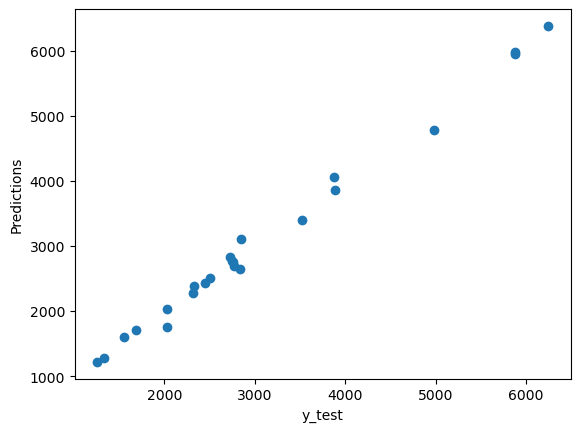

In [17]:
plt.scatter(y_test,Predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')
plt.show()

# Evaluating the Model

In [ ]:
from sklearn import metrics

In [19]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('R-squared:', metrics.r2_score(y_test, Predictions))


Mean Absolute Error: 91.02705494630827
Mean Squared Error: 14788.626448020217
R-squared: 0.9926056356164934


In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['df'])
coeff_df


,df
4s,2.974689
6s,2.714421
Mat,-5.355200
Innings,17.971800
Highest,-1.552158
100s,72.281913
50s,25.677839
Avg,18.273217
SR,-5.167305


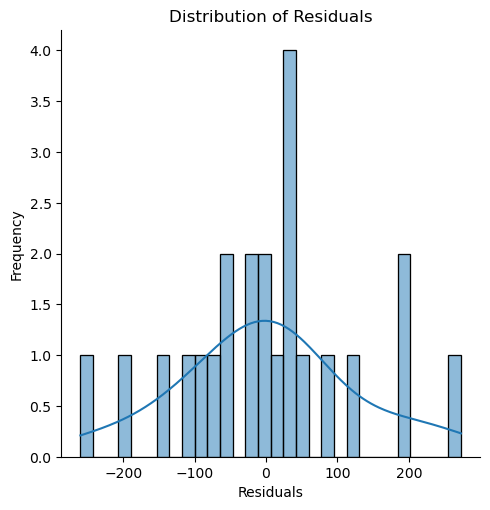

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - Predictions

# Plot using displot
sns.displot(residuals, bins=30, kde=True)  # kde=True adds a Kernel Density Estimate (optional)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()